The Numpy array object
======================

What are Numpy and Numpy arrays?
--------------------------------

<!--
**Python** objects
-   high-level number objects: integers, floating point
-   containers: lists (costless insertion and append), dictionaries (fast lookup)
-->
**Numpy** provides
-   extension package to Python for multi-dimensional arrays
-   closer to hardware (efficiency)
-   designed for scientific computation (convenience)

<!-- 
-   Also known as *array oriented computing* 

 For example, An array containing:
-   values of an experiment/simulation at discrete time steps
-   signal recorded by a measurement device, e.g. sound wave
-   pixels of an image, grey-level or colour
-   3-D data measured at different X-Y-Z positions, e.g. MRI scan



**Why it is useful:** Memory-efficient container that provides fast
numerical operations.


### Numpy Reference documentation

-   On the web: <http://docs.scipy.org/>
-   Interactive help:
-   Looking for something:
-->

### Import conventions


The recommended convention to import numpy is:

In [9]:
import numpy as np
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

But much more convenient 'magic' function can be used with IPython / Jupyter:

In [10]:
%pylab
a = array([0,1,2,3])
a

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


array([0, 1, 2, 3])

Creating arrays
---------------
<!--
### Manual construction of arrays

-   **1-D**:
-   **2-D, 3-D, ...**:
-->

In [11]:
import numpy as np
a = array([0, 1, 2, 3]) #1-D Array
print('a=',a, 'ndim=', a.ndim, 'shape=',a.shape)

a= [0 1 2 3] ndim= 1 shape= (4,)


In [40]:
b = array([ [0, 1, 2], 
            [3, 4, 5] ])    # 2 x 3 array
print('ndim=', b.ndim, 'shape=',b.shape, 'len=',len(b))
b
# len returns the size of the first dimension

ndim= 2 shape= (2, 3) len= 2


array([[0, 1, 2],
       [3, 4, 5]])

<!-- 
****Exercise: Simple arrays****

-   Create a simple two dimensional array. First, redo the examples
    from above. And then create your own: how about odd numbers counting
    backwards on the first row, and even numbers on the second?
-   Use the functions len, numpy.shape on these arrays. How do they
    relate to each other? And to the `ndim` attribute of the arrays?
-->
### Functions for creating arrays
#### Evenly spaced:

In [27]:
a = arange(10) # 0 .. n-1  (!)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
b = arange(1, 9, 2) # start, end (exclusive), step
b

array([1, 3, 5, 7])

#### or by number of points:

In [29]:
c = linspace(0, 1, 6)   # start, end, num-points
c

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

In [30]:
d = linspace(0, 1, 5, endpoint=False)
d

array([ 0. ,  0.2,  0.4,  0.6,  0.8])

#### Common arrays:

In [31]:
a = ones((3, 3))  # reminder: (3, 3) is a tuple
a

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [32]:
b = zeros((2, 2))
b

array([[ 0.,  0.],
       [ 0.,  0.]])

In [33]:
c = eye(3)
c

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [34]:
d = diag(np.array([1, 2, 3, 4]))
d

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

#### np.random: random numbers (Mersenne Twister PRNG):

### Exercise: Creating arrays using functions****

-   Experiment with `arange`, `linspace`, `ones`, `zeros`, `eye` and
    `diag`.
-   Create different kinds of arrays with random numbers.
-   Try setting the seed before creating an array with random values.
-   Look at the function `np.empty`. What does it do? When might this be
    useful?

Numpy data types
----------------

You may have noticed that, in some instances, array elements are
displayed with a trailing dot (e.g. ***`2.`*** vs ***`2`** 

This is due to a
difference in the data-type used:

<!--
> Different data-types allow us to store data more compactly in memory,
> but most of the time we simply work with floating point numbers. Note
> that, in the example above, NumPy auto-detects the data-type from the
> input.
-->
------------------------------------------------------------------------

You can explicitly specify which data-type you want:

In [37]:
c = array([1, 2, 3], dtype=float)
c.dtype

dtype('float64')

The **default** data type is floating point:

There are also other types:
- `Complex`
- `Bool`
- `Strings`
-   `int32`
-   `int64`
-   `uint32`
-   `uint64`

and much more

Basic visualization
-------------------

Once IPython has started, enable interactive plots:

In [39]:
%matplotlib inline

- The `inline` modifier is useful for notebooks to put plots inline with the code
- When using the command line IPython, use:

In [ ]:
%matplotlib 

### **1D plotting**:

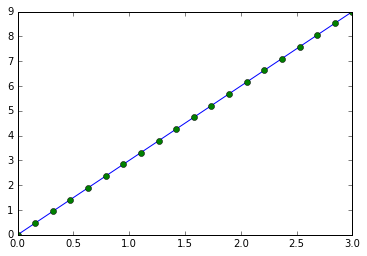

In [22]:
x = linspace(0, 3, 20)
y = linspace(0, 9, 20)
plot(x, y)       # line plot    
plot(x, y, 'o')  # dot plot    


### **2D arrays** (such as images):

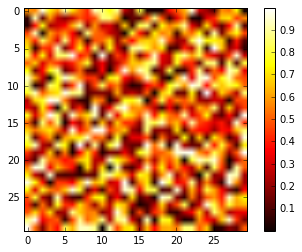

In [34]:
image = rand(30, 30)
imshow(image, cmap=plt.cm.hot)    
colorbar()    

****Exercise: Simple visualizations****

-   Plot some simple arrays: a cosine as a function of time and a
    2D matrix.
-   Try using the `gray` colormap on the 2D matrix.

Indexing and slicing
--------------------

The items of an array can be accessed and assigned to the same way as
other Python sequences (e.g. lists):

In [37]:
a = np.arange(10)
print('a=',a,'\n')

print(a[0], a[2], a[-1])

a= [0 1 2 3 4 5 6 7 8 9] 

0 2 9


> ***warning***
>
> Indices begin at 0, like other Python sequences (and C/C++). In
> contrast, in Fortran or Matlab, indices begin at 1.

<!-- The usual python idiom for reversing a sequence is supported: -->
<!--
For multidimensional arrays, indexes are tuples of integers:

> **note**
>
> -   In 2D, the first dimension corresponds to **rows**, the second to
>     **columns**.
> -   for multidimensional `a`, `a[0]` is interpreted by taking all
>     elements in the unspecified dimensions.
-->

**Slicing**: Arrays, like other Python sequences can also be sliced:

In [43]:
a = np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [44]:
a[2:11:3] # [start:end:step]

array([2, 5, 8])

All three slice components are not required: by default, start is 0, end
is the last and step is 1:

In [46]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [47]:
a[1:3]

array([1, 2])

In [48]:
a[::2]

array([ 0,  2,  4,  6,  8, 10, 12, 14])

In [51]:
a[3:]

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

A small illustrated summary of Numpy indexing and slicing...

<img src="numpy_indexing.png">


You can also combine assignment and slicing:

In [53]:
a = arange(10)
a[5:] = 10
a

array([ 0,  1,  2,  3,  4, 10, 10, 10, 10, 10])

In [63]:
b = arange(20,25,1)
b

array([20, 21, 22, 23, 24])

In [65]:
a[5:] = b
a

array([ 0,  1,  2,  3,  4, 20, 21, 22, 23, 24])

****Exercise: Indexing and slicing****

<!--
-   Try the different flavours of slicing, using `start`, `end` and
    `step`: starting from a linspace, try to obtain odd numbers counting
    backwards, and even numbers counting forwards.
-   Reproduce the slices in the diagram above. You may use the following
    expression to create the array:

****Exercise: Array creation****

Create the following arrays (with correct data types):

    [[1, 1, 1, 1],
     [1, 1, 1, 1],
     [1, 1, 1, 2],
     [1, 6, 1, 1]]

    [[0., 0., 0., 0., 0.],
     [2., 0., 0., 0., 0.],
     [0., 3., 0., 0., 0.],
     [0., 0., 4., 0., 0.],
     [0., 0., 0., 5., 0.],
     [0., 0., 0., 0., 6.]]

Par on course: 3 statements for each

*Hint*: Individual array elements can be accessed similarly to a list,
e.g. `a[1]` or `a[1, 2]`.

*Hint*: Examine the docstring for `diag`.

**Exercise: Tiling for array creation**

Skim through the documentation for `np.tile`, and use this function to
construct the array:

    [[4, 3, 4, 3, 4, 3],
     [2, 1, 2, 1, 2, 1],
     [4, 3, 4, 3, 4, 3],
     [2, 1, 2, 1, 2, 1]]
-->

Copies and views
----------------
A slicing operation creates a **view** on the original array - i.e. at the same memory!

**When modifying the view, the original array is modified as well**:

In [70]:
a = arange(42,52)
a

array([42, 43, 44, 45, 46, 47, 48, 49, 50, 51])

In [71]:
b = a[0:5]
b

array([42, 43, 44, 45, 46])

In [77]:
b[0] = 13
b

array([13, 43, 44, 45, 46])

In [78]:
a

array([13, 43, 44, 45, 46, 47, 48, 49, 50, 51])

extra sliceing info

<!--

A slicing operation creates a **view** on the original array, which is
just a way of accessing array data. Thus the original array is not
copied in memory. You can use `np.may_share_memory()` to check if two
arrays share the same memory block. Note however, that this uses
heuristics and may give you false positives.

**When modifying the view, the original array is modified as well**:

This behavior can be surprising at first sight... but it allows to save
both memory and time.

**Worked example: Prime number sieve**

![image](images/prime-sieve.png)

Compute prime numbers in 0--99, with a sieve

-   Construct a shape (100,) boolean array `is_prime`, filled with True
    in the beginning:



-   Cross out 0 and 1 which are not primes:



-   For each integer `j` starting from 2, cross out its higher
    multiples:



-   Skim through `help(np.nonzero)`, and print the prime numbers
-   Follow-up:

    -   Move the above code into a script file named `prime_sieve.py`
    -   Run it to check it works
    -   Use the optimization suggested in [the sieve of
        Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes):

    > 1.  Skip `j` which are already known to not be primes
    > 2.  The first number to cross out is $j^2$

Fancy indexing
--------------

> **tip**
>
> Numpy arrays can be indexed with slices, but also with boolean or
> integer arrays (**masks**). This method is called *fancy indexing*. It
> creates **copies not views**.

### Using boolean masks

Indexing with a mask can be very useful to assign a new value to a
sub-array:

### Indexing with an array of integers

Indexing can be done with an array of integers, where the same index is
repeated several time:

New values can be assigned with this kind of indexing:

> **tip**
>
> When a new array is created by indexing with an array of integers, the
> new array has the same shape than the array of integers:

The image below illustrates various fancy indexing applications

****Exercise: Fancy indexing****

-   Again, reproduce the fancy indexing shown in the diagram above.
-   Use fancy indexing on the left and array creation on the right to
    assign values into an array, for instance by setting parts of the
    array in the diagram above to zero.
    
-->